# FYP Model Training

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import catboost as ctb
# !pip install imbalanced-learn
import imblearn
# !pip install catboost
# !pip install xgboost
import xgboost as XGB
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import average_precision_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## Exploring the Dataset in Python
### Loading Data

In [2]:
#Loading fyp dataset
df=pd.read_csv("SafeNav Data Collection Survey (Responses) 500.csv")
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
df

Timestamp                 Email Address                 Age   
0    11/17/2023 19:32:28       mashalabbas58@gmail.com         13-24 years  \
1    11/17/2023 19:33:27     s.m.jehanzeb127@gmail.com         13-24 years   
2    11/17/2023 19:33:43    syedmaazalinaqvi@gmail.com         13-24 years   
3    11/17/2023 19:52:53    abdullahsiddiqi3@gmail.com         13-24 years   
4    11/17/2023 19:58:24        amnasaeed383@gmail.com         13-24 years   
..                   ...                           ...                 ...   
495   5/11/2024 18:57:08  abdulsamikhan36912@gmail.com         13-24 years   
496   5/11/2024 18:58:08  abdulsamikhan36912@gmail.com         13-24 years   
497   5/11/2024 18:58:49  abdulsamikhan36912@gmail.com  25 years and above   
498   5/11/2024 18:58:49  abdulsamikhan36912@gmail.com  25 years and above   
499  11/17/2023 19:58:24  abdulsamikhan36912@gmail.com  25 years and above   

     Gender                        Nearby location of incident   
0    Female                                   Johar Mor, Johar  \
1      Male                                 Dolmen Mall Hyderi   
2      Male  Lasania service road near Bank (ATM), Gulshan-...   
3      Male                                   Aziz bhatti park   
4    Female                         Near luckyone round about    
..      ...                                                ...   
495    Male                               Sir Syed University    
496    Male                      Nazimabad near Imtiaz market    
497    Male                       FM Public school Buffer zone   
498    Male                  Karachi Academy school (Azizabad)   
499    Male                        Johar Mor, Gulistan e johar   

    Time of Incident Date of Incident         District                Crime   
0       5 AM - 12 PM       11/17/2023     Karachi East              Robbery  \
1        5 PM - 8 PM       11/17/2023  Karachi Central              Dacoity   
2         8 PM- 5 AM        11/2/2023     Karachi East              Robbery   
3         8 PM- 5 AM       10/10/2020     Karachi East              Robbery   
4       12 PM - 5 PM        2/17/2023     Karachi East               Murder   
..               ...              ...              ...                  ...   
495     12 PM - 5 PM        4/15/2020     Karachi East              Dacoity   
496     12 PM - 5 PM        4/15/2020  Karachi Central              Dacoity   
497     12 PM - 5 PM        4/14/2024  Karachi Central  Motor vehicle theft   
498     12 PM - 5 PM        4/14/2024  Karachi Central              Dacoity   
499     12 PM - 5 PM        2/17/2023     Karachi East               Murder   

    Transportation mode used  Latitude  Longitude  
0      Public transportation  24.90466   67.11360  
1                       Bike  24.93549   67.04049  
2                       Bike  24.90742   67.10990  
3                       Bike  24.91315   67.09651  
4                        Car  24.92603   67.09004  
..                       ...       ...        ...  
495                     Bike  24.91626   67.09312  
496                     Bike  24.91859   67.03210  
497                Car, Bike  24.96151   67.06567  
498                Car, Bike  24.91833   67.06817  
499                      Car  24.90466   67.11360  

[500 rows x 12 columns]

In [3]:
df.info()    #printing info about df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Timestamp                    500 non-null    object 
 1   Email Address                500 non-null    object 
 2   Age                          500 non-null    object 
 3   Gender                       500 non-null    object 
 4   Nearby location of incident  500 non-null    object 
 5   Time of Incident             500 non-null    object 
 6   Date of Incident             500 non-null    object 
 7   District                     500 non-null    object 
 8   Crime                        500 non-null    object 
 9   Transportation mode used     500 non-null    object 
 10  Latitude                     500 non-null    float64
 11  Longitude                    500 non-null    float64
dtypes: float64(2), object(10)
memory usage: 47.0+ KB


In [4]:
df.head(10)  #first 10 rows

Timestamp               Email Address                 Age   
0  11/17/2023 19:32:28     mashalabbas58@gmail.com         13-24 years  \
1  11/17/2023 19:33:27   s.m.jehanzeb127@gmail.com         13-24 years   
2  11/17/2023 19:33:43  syedmaazalinaqvi@gmail.com         13-24 years   
3  11/17/2023 19:52:53  abdullahsiddiqi3@gmail.com         13-24 years   
4  11/17/2023 19:58:24      amnasaeed383@gmail.com         13-24 years   
5  11/17/2023 19:58:24      amnasaeed383@gmail.com         13-24 years   
6  11/17/2023 20:05:00     hayyan.ghauri@gmail.com         13-24 years   
7  11/17/2023 20:12:59      mohsinaliq69@gmail.com         13-24 years   
8  11/17/2023 20:12:59      mohsinaliq69@gmail.com         13-24 years   
9  11/17/2023 20:17:05     maazrashid014@gmail.com  25 years and above   

   Gender                        Nearby location of incident Time of Incident   
0  Female                                   Johar Mor, Johar     5 AM - 12 PM  \
1    Male                                 Dolmen Mall Hyderi      5 PM - 8 PM   
2    Male  Lasania service road near Bank (ATM), Gulshan-...       8 PM- 5 AM   
3    Male                                   Aziz bhatti park       8 PM- 5 AM   
4  Female                         Near luckyone round about      12 PM - 5 PM   
5  Female                        Johar Mor, Gulistan e johar     12 PM - 5 PM   
6    Male                           Kamran Roundabout, Johar       8 PM- 5 AM   
7    Male      bait ul mukaram Masjid, University road Johar      5 PM - 8 PM   
8    Male                                     Nipa chowrangi      5 PM - 8 PM   
9    Male                          Lalu Khait Pull 10 Number       8 PM- 5 AM   

  Date of Incident         District    Crime Transportation mode used   
0       11/17/2023     Karachi East  Robbery    Public transportation  \
1       11/17/2023  Karachi Central  Dacoity                     Bike   
2        11/2/2023     Karachi East  Robbery                     Bike   
3       10/10/2020     Karachi East  Robbery                     Bike   
4        2/17/2023     Karachi East   Murder                      Car   
5        2/17/2023     Karachi East   Murder                      Car   
6        9/22/2023     Karachi East  Robbery                      Car   
7         7/1/2023     Karachi East  Dacoity    Public transportation   
8         7/1/2023     Karachi East  Dacoity    Public transportation   
9        7/26/2023  Karachi Central  Robbery                      Car   

   Latitude  Longitude  
0  24.90466   67.11360  
1  24.93549   67.04049  
2  24.90742   67.10990  
3  24.91315   67.09651  
4  24.92603   67.09004  
5  24.90466   67.11360  
6  24.92375   67.13778  
7  24.90641   67.08358  
8  24.91768   67.09713  
9  24.90957   67.04950

In [5]:
df.describe()

Latitude   Longitude
count  500.000000  500.000000
mean    24.910623   67.080263
std      0.045677    0.052967
min     24.750600   66.928050
25%     24.889785   67.047843
50%     24.917680   67.072905
75%     24.938188   67.107520
max     25.025240   67.364440

# **Data Preprocessing**

### Step1: Checking for duplicate rows (Data Cleaning)

In [6]:
# check for duplicate values
duplicate_values = df.duplicated()
print(duplicate_values)

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool


In [7]:
#removing duplicate rows, considering first duplicate row as unique
df.drop_duplicates(keep='first', inplace=True)
df=df.reset_index(drop=True)   #resetting index
df

Timestamp                 Email Address                 Age   
0    11/17/2023 19:32:28       mashalabbas58@gmail.com         13-24 years  \
1    11/17/2023 19:33:27     s.m.jehanzeb127@gmail.com         13-24 years   
2    11/17/2023 19:33:43    syedmaazalinaqvi@gmail.com         13-24 years   
3    11/17/2023 19:52:53    abdullahsiddiqi3@gmail.com         13-24 years   
4    11/17/2023 19:58:24        amnasaeed383@gmail.com         13-24 years   
..                   ...                           ...                 ...   
495   5/11/2024 18:57:08  abdulsamikhan36912@gmail.com         13-24 years   
496   5/11/2024 18:58:08  abdulsamikhan36912@gmail.com         13-24 years   
497   5/11/2024 18:58:49  abdulsamikhan36912@gmail.com  25 years and above   
498   5/11/2024 18:58:49  abdulsamikhan36912@gmail.com  25 years and above   
499  11/17/2023 19:58:24  abdulsamikhan36912@gmail.com  25 years and above   

     Gender                        Nearby location of incident   
0    Female                                   Johar Mor, Johar  \
1      Male                                 Dolmen Mall Hyderi   
2      Male  Lasania service road near Bank (ATM), Gulshan-...   
3      Male                                   Aziz bhatti park   
4    Female                         Near luckyone round about    
..      ...                                                ...   
495    Male                               Sir Syed University    
496    Male                      Nazimabad near Imtiaz market    
497    Male                       FM Public school Buffer zone   
498    Male                  Karachi Academy school (Azizabad)   
499    Male                        Johar Mor, Gulistan e johar   

    Time of Incident Date of Incident         District                Crime   
0       5 AM - 12 PM       11/17/2023     Karachi East              Robbery  \
1        5 PM - 8 PM       11/17/2023  Karachi Central              Dacoity   
2         8 PM- 5 AM        11/2/2023     Karachi East              Robbery   
3         8 PM- 5 AM       10/10/2020     Karachi East              Robbery   
4       12 PM - 5 PM        2/17/2023     Karachi East               Murder   
..               ...              ...              ...                  ...   
495     12 PM - 5 PM        4/15/2020     Karachi East              Dacoity   
496     12 PM - 5 PM        4/15/2020  Karachi Central              Dacoity   
497     12 PM - 5 PM        4/14/2024  Karachi Central  Motor vehicle theft   
498     12 PM - 5 PM        4/14/2024  Karachi Central              Dacoity   
499     12 PM - 5 PM        2/17/2023     Karachi East               Murder   

    Transportation mode used  Latitude  Longitude  
0      Public transportation  24.90466   67.11360  
1                       Bike  24.93549   67.04049  
2                       Bike  24.90742   67.10990  
3                       Bike  24.91315   67.09651  
4                        Car  24.92603   67.09004  
..                       ...       ...        ...  
495                     Bike  24.91626   67.09312  
496                     Bike  24.91859   67.03210  
497                Car, Bike  24.96151   67.06567  
498                Car, Bike  24.91833   67.06817  
499                      Car  24.90466   67.11360  

[500 rows x 12 columns]

==> Established that there are no duplicate rows.

### Step2: Checking for null values (Data Cleaning)

In [8]:
missing=df.isna().sum()   #counting null values in dataset
missing

Timestamp                      0
Email Address                  0
Age                            0
Gender                         0
Nearby location of incident    0
Time of Incident               0
Date of Incident               0
District                       0
Crime                          0
Transportation mode used       0
Latitude                       0
Longitude                      0
dtype: int64

==> Established that there are no null values.

### Step3: Removing irrelevant attributes

==> We will remove Timestamp, Email Address and Date of Incident columns since it doesn't really seem to affect the way in     which a machine would learn data, atleast to the naked eye.

==> Age, Gender, District, Crime, Transportation mode used features will also be removed, but after Data Visualisation so    we can study the underlying phenomenon that is generating the data.

==> Nearby location of incident feature will be removed after evaluating target variable.

==> We will have 3 input/feature variables namely Time of Incident, Latitude and Longitude.

==> Output/Target variable will be Crime Score which will be evaluated later.

In [9]:
#dropping irrelevant columns from dataset
df.drop(["Timestamp"], axis=1, inplace=True)
df.drop(["Email Address"], axis=1, inplace=True)
df.drop(["Date of Incident"], axis=1, inplace=True)

In [10]:
df=df.reset_index(drop=True)   #resetting index to default integer index
df   #changes incorporated permanently

Age  Gender   
0           13-24 years  Female  \
1           13-24 years    Male   
2           13-24 years    Male   
3           13-24 years    Male   
4           13-24 years  Female   
..                  ...     ...   
495         13-24 years    Male   
496         13-24 years    Male   
497  25 years and above    Male   
498  25 years and above    Male   
499  25 years and above    Male   

                           Nearby location of incident Time of Incident   
0                                     Johar Mor, Johar     5 AM - 12 PM  \
1                                   Dolmen Mall Hyderi      5 PM - 8 PM   
2    Lasania service road near Bank (ATM), Gulshan-...       8 PM- 5 AM   
3                                     Aziz bhatti park       8 PM- 5 AM   
4                           Near luckyone round about      12 PM - 5 PM   
..                                                 ...              ...   
495                               Sir Syed University      12 PM - 5 PM   
496                      Nazimabad near Imtiaz market      12 PM - 5 PM   
497                       FM Public school Buffer zone     12 PM - 5 PM   
498                  Karachi Academy school (Azizabad)     12 PM - 5 PM   
499                        Johar Mor, Gulistan e johar     12 PM - 5 PM   

            District                Crime Transportation mode used  Latitude   
0       Karachi East              Robbery    Public transportation  24.90466  \
1    Karachi Central              Dacoity                     Bike  24.93549   
2       Karachi East              Robbery                     Bike  24.90742   
3       Karachi East              Robbery                     Bike  24.91315   
4       Karachi East               Murder                      Car  24.92603   
..               ...                  ...                      ...       ...   
495     Karachi East              Dacoity                     Bike  24.91626   
496  Karachi Central              Dacoity                     Bike  24.91859   
497  Karachi Central  Motor vehicle theft                Car, Bike  24.96151   
498  Karachi Central              Dacoity                Car, Bike  24.91833   
499     Karachi East               Murder                      Car  24.90466   

     Longitude  
0     67.11360  
1     67.04049  
2     67.10990  
3     67.09651  
4     67.09004  
..         ...  
495   67.09312  
496   67.03210  
497   67.06567  
498   67.06817  
499   67.11360  

[500 rows x 9 columns]

### Step4: Data Visualization ==> Checking and removing outliers

==> Outliers can only be checked for numerical data, our dataset contains only two numerical (float) features namely Latitude and Longitude. However, we will not check these features for outliers as their data was manually prepared.

In [11]:
# df.boxplot(column =['Latitude','Longitude'],figsize=(10,10), grid = False)   #constructing boxplot
# plt.title('Box Plot Of Features Before Removing Outliers')
# plt.show()

In [12]:
# #For Latitude feature
# # Calculate the interquartile range (IQR)
# Q1 = df['Latitude'].quantile(0.25)
# Q3 = df['Latitude'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the threshold for Latitude outliers
# threshold = 1.5

# # Remove Latitude outliers from the dataset
# df= df[(df['Latitude'] >= Q1 - threshold * IQR) &
#                              (df['Latitude'] <= Q3 + threshold * IQR)]

# #For Longitude feature
# # Calculate the interquartile range (IQR)
# Q1 = df['Longitude'].quantile(0.25)
# Q3 = df['Longitude'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the threshold for Longitude outliers
# threshold = 1.5

# # Remove Longitude outliers from the dataset
# df= df[(df['Longitude'] >= Q1 - threshold * IQR) &
#                              (df['Longitude'] <= Q3 + threshold * IQR)]

# df=df.reset_index(drop=True)   #resetting index
# df   #after removing outliers

In [13]:
# df.boxplot(column =['Latitude','Longitude'],figsize=(10,10), grid = False)   #constructing boxplot
# plt.title('Box Plot Of Features After Removing Outliers')
# plt.show()

### Making Histograms, ScatterPlots and CountPlots

In [14]:
# sns.set_style("whitegrid")
# plt.figure(figsize=(6,6))
# plt.pie(df['Age'], labels=df['Age'], autopct='%1.1f%%')
# plt.title('My Pie Chart')
# plt.show()

In [15]:
#checking number of instances of each unique value in District feature
df["District"].value_counts()

District
Karachi Central    193
Karachi East       158
Karachi South       54
Korangi             38
Malir               29
Orangi              15
Keamari             13
Name: count, dtype: int64

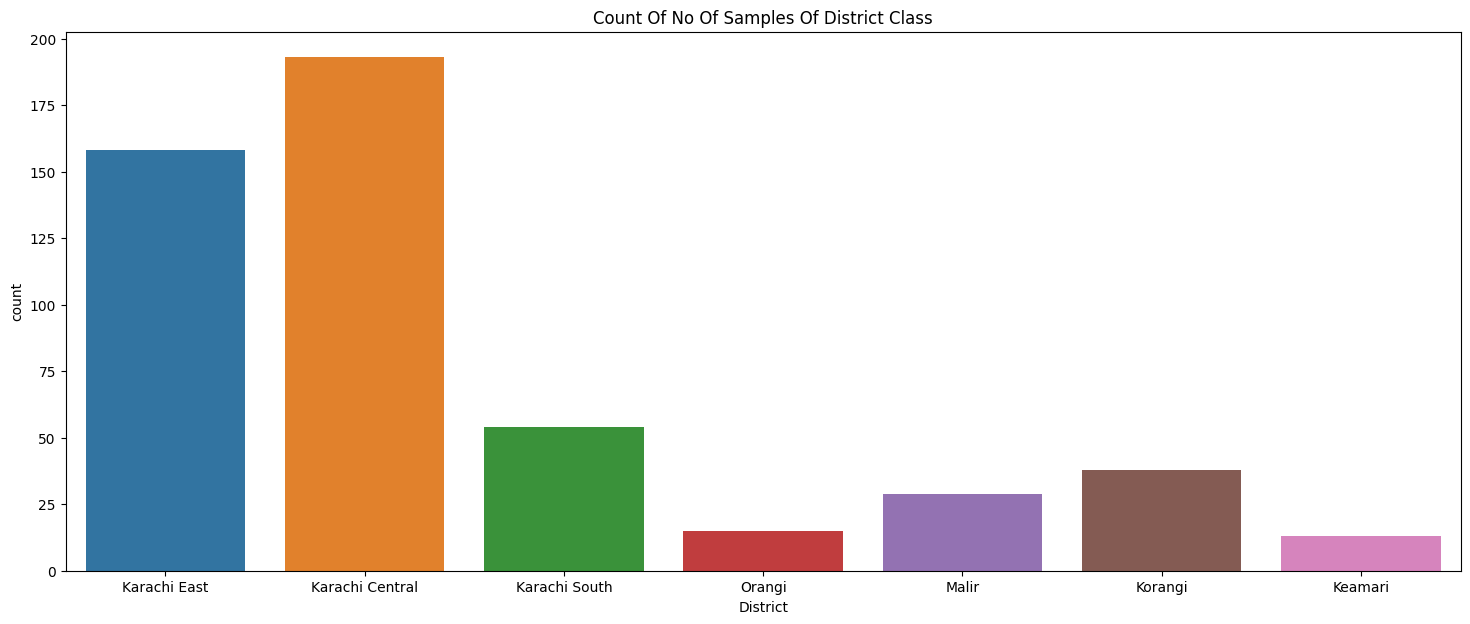

In [16]:
# getting distribution of the input variables
plt.figure(figsize=(18,7))
sns.countplot(x="District", data = df)               #countplot
plt.title('Count Of No Of Samples Of District Class')
plt.show()

In [17]:
# getting distribution of the input variable
plt.figure(figsize=(10, 5))
sns.countplot(x="Crime", data = df)               #countplot
plt.title('Count Of No Of Samples Of Crime Class')
plt.show()

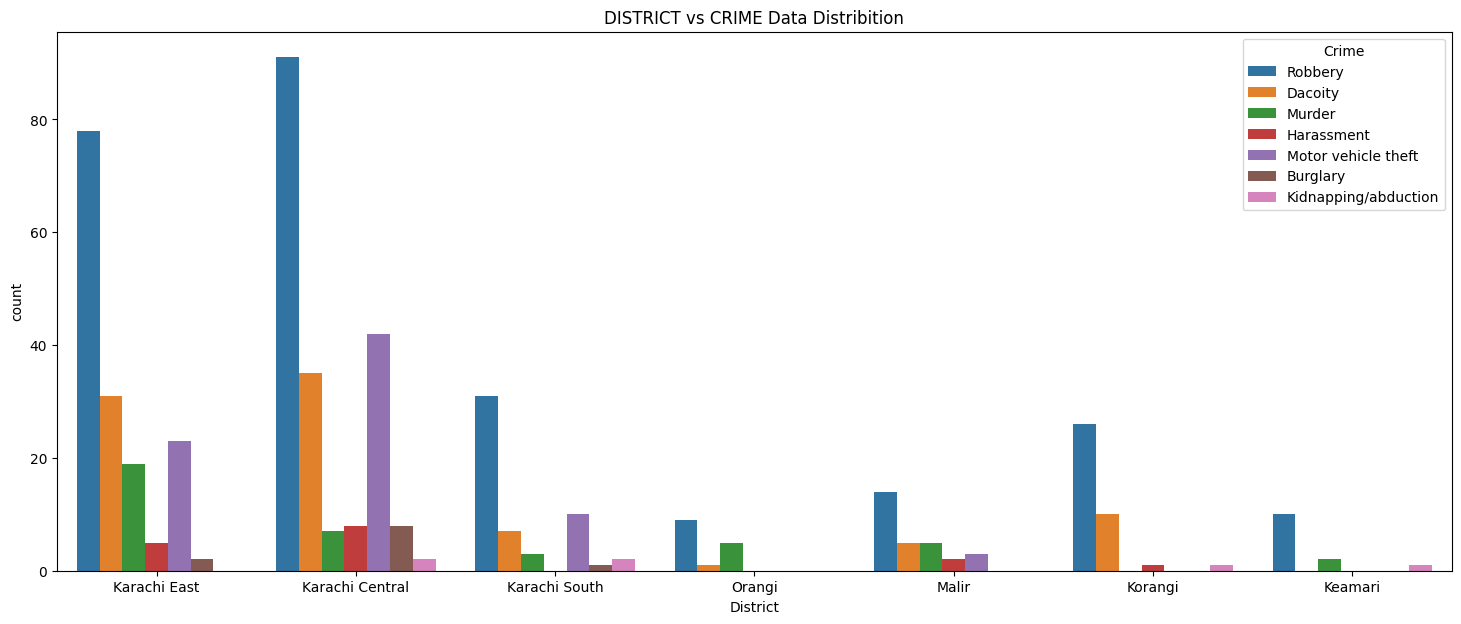

In [18]:
# getting distribution of the input variable
plt.figure(figsize=(18, 7))
sns.countplot(x ='District', hue = 'Crime', data = df)             #countplot
plt.title('DISTRICT vs CRIME Data Distribition')
plt.show()

In [19]:
# getting distribution of the input variable
plt.figure(figsize=(18, 5))
sns.countplot(x ='District', hue = 'Time of Incident', data = df)             #countplot
plt.title('DISTRICT vs TIME OF INCIDENT Data Distribition')
plt.show()

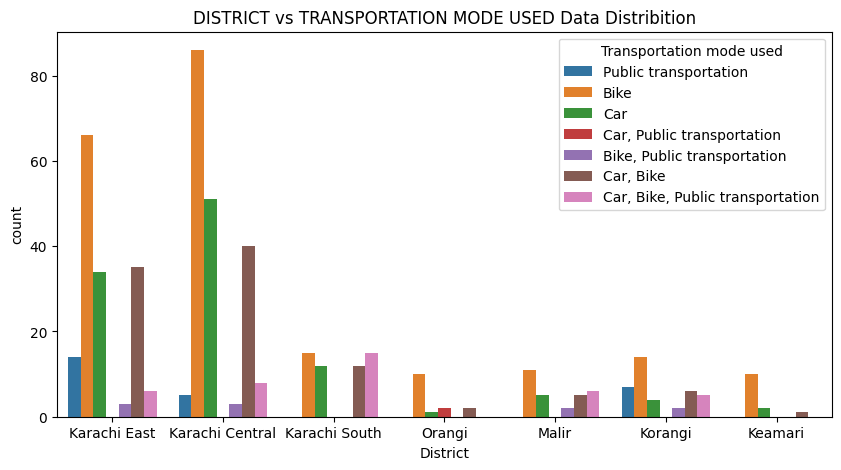

In [20]:
# getting distribution of the input variable
plt.figure(figsize=(10, 5))
sns.countplot(x ='District', hue = 'Transportation mode used', data = df)             #countplot
plt.title('DISTRICT vs TRANSPORTATION MODE USED Data Distribition')
plt.show()

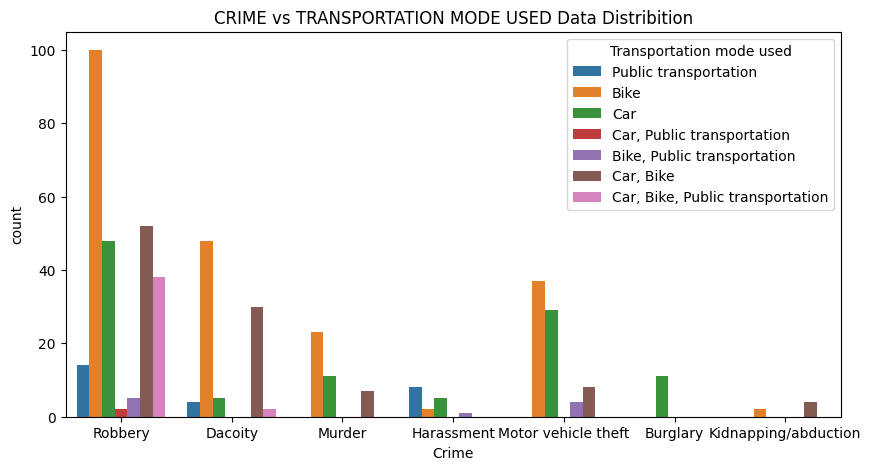

In [21]:
# getting distribution of the input variable
plt.figure(figsize=(10, 5))
sns.countplot(x ='Crime', hue = 'Transportation mode used', data = df)             #countplot
plt.title('CRIME vs TRANSPORTATION MODE USED Data Distribition')
plt.show()

In [22]:
# getting distribution of the input variable
# plt.figure(figsize=(10, 5))
sns.countplot(y ='Gender', hue = 'Age', data = df)               #countplot
plt.title('GENDER vs AGE Data Distribition')
plt.show()

In [23]:
# getting distribution of the input variable
plt.figure(figsize=(8, 6))
sns.countplot(y ='Age', hue = 'Crime', data = df)             #countplot
plt.title('AGE vs CRIME Data Distribition')
plt.show()

In [24]:
# getting distribution of the input variable
plt.figure(figsize=(8, 5))
sns.countplot(y ='Gender', hue = 'Crime', data = df)             #countplot
plt.title('GENDER vs CRIME Data Distribition')
plt.show()

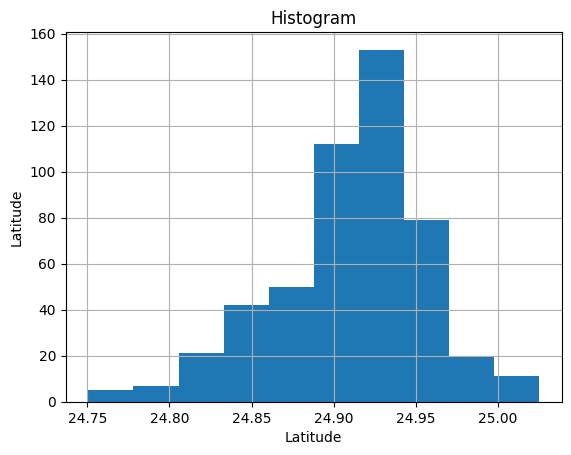

In [25]:
#analysing data
df.hist(column='Latitude')   #histogram
plt.title('Histogram')
plt.xlabel('Latitude')
plt.ylabel('Latitude')
plt.show()

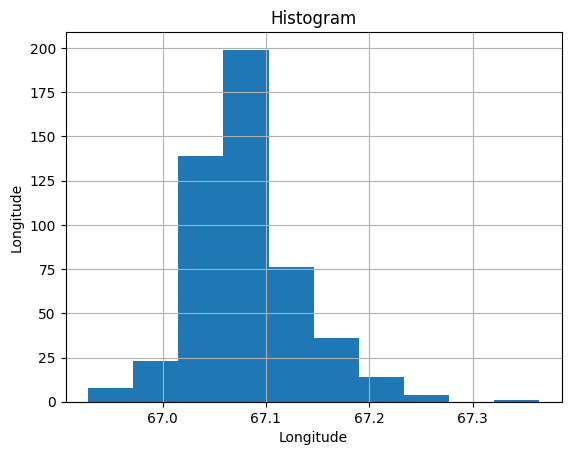

In [26]:
#analysing data
df.hist(column='Longitude')   #histogram
plt.title('Histogram')
plt.xlabel('Longitude')
plt.ylabel('Longitude')
plt.show()

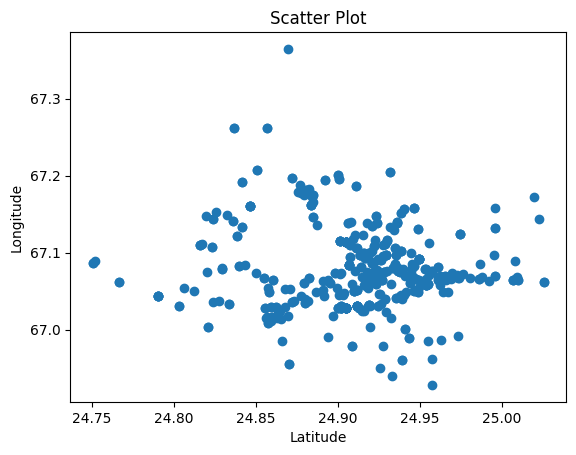

In [27]:
#analysing data
plt.scatter(df["Latitude"], df["Longitude"])    #scatterplot
plt.title('Scatter Plot')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

==> Very low correlation can be observed between Latitude and Longitude variables

###### Now, we will drop the remaining irrelevant columns except for Nearby location of incident

In [28]:
#dropping irrelevant columns from dataset
df.drop(["Age"], axis=1, inplace=True)
df.drop(["Gender"], axis=1, inplace=True)
df.drop(["District"], axis=1, inplace=True)
df.drop(["Crime"], axis=1, inplace=True)
df.drop(["Transportation mode used"], axis=1, inplace=True)

In [29]:
df=df.reset_index(drop=True)   #resetting index to default integer index
df   #changes incorporated permanently

Nearby location of incident Time of Incident   
0                                     Johar Mor, Johar     5 AM - 12 PM  \
1                                   Dolmen Mall Hyderi      5 PM - 8 PM   
2    Lasania service road near Bank (ATM), Gulshan-...       8 PM- 5 AM   
3                                     Aziz bhatti park       8 PM- 5 AM   
4                           Near luckyone round about      12 PM - 5 PM   
..                                                 ...              ...   
495                               Sir Syed University      12 PM - 5 PM   
496                      Nazimabad near Imtiaz market      12 PM - 5 PM   
497                       FM Public school Buffer zone     12 PM - 5 PM   
498                  Karachi Academy school (Azizabad)     12 PM - 5 PM   
499                        Johar Mor, Gulistan e johar     12 PM - 5 PM   

     Latitude  Longitude  
0    24.90466   67.11360  
1    24.93549   67.04049  
2    24.90742   67.10990  
3    24.91315   67.09651  
4    24.92603   67.09004  
..        ...        ...  
495  24.91626   67.09312  
496  24.91859   67.03210  
497  24.96151   67.06567  
498  24.91833   67.06817  
499  24.90466   67.11360  

[500 rows x 4 columns]

### Step5: Adding and Evaluating the Target Variable "Crime_Score"

==> Crime score will be calculated by counting the number of occurreneces of the longitude & latitude of a location for a particular Time of Incident.

==> Time of Incident is divided into four time zones as seen during data visualization.

==> Once Crime Score is evaluated, we will remove the duplicate rows keeping only the last instance of each duplicate row which will then give us the Crime Score for each unique location.

In [30]:
#checking number of unique locations in dataset
df["Latitude"].value_counts()

Latitude
24.91768    18
24.90466    12
24.90512    12
24.91158     8
24.90207     6
            ..
24.95359     1
24.91793     1
24.96584     1
24.85948     1
24.91833     1
Name: count, Length: 280, dtype: int64

In [31]:
# Creating Crime Score Column
value = 0    #initially setting to 0
 
# Add the new column using loc
df.loc[:, "Crime_Score"] = value
df

Nearby location of incident Time of Incident   
0                                     Johar Mor, Johar     5 AM - 12 PM  \
1                                   Dolmen Mall Hyderi      5 PM - 8 PM   
2    Lasania service road near Bank (ATM), Gulshan-...       8 PM- 5 AM   
3                                     Aziz bhatti park       8 PM- 5 AM   
4                           Near luckyone round about      12 PM - 5 PM   
..                                                 ...              ...   
495                               Sir Syed University      12 PM - 5 PM   
496                      Nazimabad near Imtiaz market      12 PM - 5 PM   
497                       FM Public school Buffer zone     12 PM - 5 PM   
498                  Karachi Academy school (Azizabad)     12 PM - 5 PM   
499                        Johar Mor, Gulistan e johar     12 PM - 5 PM   

     Latitude  Longitude  Crime_Score  
0    24.90466   67.11360            0  
1    24.93549   67.04049            0  
2    24.90742   67.10990            0  
3    24.91315   67.09651            0  
4    24.92603   67.09004            0  
..        ...        ...          ...  
495  24.91626   67.09312            0  
496  24.91859   67.03210            0  
497  24.96151   67.06567            0  
498  24.91833   67.06817            0  
499  24.90466   67.11360            0  

[500 rows x 5 columns]

==> We have used the GroupBy.cumcount() function to evaluate Crime Score. This function returns the cumulative count of occurrences within each group. The “groupby” operation in pandas is used to split a DataFrame into groups based on some criteria. It creates a GroupBy object that can be used to perform various operations on each group. The “cumcount” method is applied to a GroupBy object which in this case includes Time of Incident, Latitude and Longitude columns, and then computes the cumulative count of occurrences within each group. It starts from 0 and increments by 1 for each occurrence in the group.

In [32]:
#using cumcount() from groupby. It counts the amount of the same values in each group starting from 0.
s = df.groupby(['Time of Incident', 'Latitude', 'Longitude']).cumcount()
df['Crime_Score'] =  s+1
df

Nearby location of incident Time of Incident   
0                                     Johar Mor, Johar     5 AM - 12 PM  \
1                                   Dolmen Mall Hyderi      5 PM - 8 PM   
2    Lasania service road near Bank (ATM), Gulshan-...       8 PM- 5 AM   
3                                     Aziz bhatti park       8 PM- 5 AM   
4                           Near luckyone round about      12 PM - 5 PM   
..                                                 ...              ...   
495                               Sir Syed University      12 PM - 5 PM   
496                      Nazimabad near Imtiaz market      12 PM - 5 PM   
497                       FM Public school Buffer zone     12 PM - 5 PM   
498                  Karachi Academy school (Azizabad)     12 PM - 5 PM   
499                        Johar Mor, Gulistan e johar     12 PM - 5 PM   

     Latitude  Longitude  Crime_Score  
0    24.90466   67.11360            1  
1    24.93549   67.04049            1  
2    24.90742   67.10990            1  
3    24.91315   67.09651            1  
4    24.92603   67.09004            1  
..        ...        ...          ...  
495  24.91626   67.09312            3  
496  24.91859   67.03210            2  
497  24.96151   67.06567            3  
498  24.91833   67.06817            1  
499  24.90466   67.11360            8  

[500 rows x 5 columns]

==> Now, we will remove the duplicate rows keeping only the last instance of each duplicate row which will then give us the     Crime Score for each unique location.

In [33]:
#removing duplicate rows, considering first duplicate row as unique
df.drop_duplicates(subset=['Time of Incident','Latitude','Longitude'], keep='last', inplace=True)
df=df.reset_index(drop=True)   #resetting index
df

Nearby location of incident Time of Incident   
0                                   Dolmen Mall Hyderi      5 PM - 8 PM  \
1                           Near luckyone round about      12 PM - 5 PM   
2                                    Dhamthal, Fb area     12 PM - 5 PM   
3         Near Al-Jadeed SuperMarket, University Road      12 PM - 5 PM   
4    Rafah-e-aam park, Society beside rafah-e-aam p...      5 PM - 8 PM   
..                                                 ...              ...   
318                               Sir Syed University      12 PM - 5 PM   
319                      Nazimabad near Imtiaz market      12 PM - 5 PM   
320                       FM Public school Buffer zone     12 PM - 5 PM   
321                  Karachi Academy school (Azizabad)     12 PM - 5 PM   
322                        Johar Mor, Gulistan e johar     12 PM - 5 PM   

     Latitude  Longitude  Crime_Score  
0    24.93549   67.04049            1  
1    24.92603   67.09004            1  
2    24.92688   67.06495            1  
3    24.93582   67.13938            1  
4    24.87935   67.17499            1  
..        ...        ...          ...  
318  24.91626   67.09312            3  
319  24.91859   67.03210            2  
320  24.96151   67.06567            3  
321  24.91833   67.06817            1  
322  24.90466   67.11360            8  

[323 rows x 5 columns]

In [34]:
#display entire dataset
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
df

Nearby location of incident Time of Incident   
0                                   Dolmen Mall Hyderi      5 PM - 8 PM  \
1                           Near luckyone round about      12 PM - 5 PM   
2                                    Dhamthal, Fb area     12 PM - 5 PM   
3         Near Al-Jadeed SuperMarket, University Road      12 PM - 5 PM   
4    Rafah-e-aam park, Society beside rafah-e-aam p...      5 PM - 8 PM   
..                                                 ...              ...   
318                               Sir Syed University      12 PM - 5 PM   
319                      Nazimabad near Imtiaz market      12 PM - 5 PM   
320                       FM Public school Buffer zone     12 PM - 5 PM   
321                  Karachi Academy school (Azizabad)     12 PM - 5 PM   
322                        Johar Mor, Gulistan e johar     12 PM - 5 PM   

     Latitude  Longitude  Crime_Score  
0    24.93549   67.04049            1  
1    24.92603   67.09004            1  
2    24.92688   67.06495            1  
3    24.93582   67.13938            1  
4    24.87935   67.17499            1  
..        ...        ...          ...  
318  24.91626   67.09312            3  
319  24.91859   67.03210            2  
320  24.96151   67.06567            3  
321  24.91833   67.06817            1  
322  24.90466   67.11360            8  

[323 rows x 5 columns]

###### removing Nearby location of incident feature 

In [35]:
df.drop(["Nearby location of incident"], axis=1, inplace=True)
df=df.reset_index(drop=True)   #resetting index to default integer index
df   #changes incorporated permanently

Time of Incident  Latitude  Longitude  Crime_Score
0        5 PM - 8 PM  24.93549   67.04049            1
1       12 PM - 5 PM  24.92603   67.09004            1
2       12 PM - 5 PM  24.92688   67.06495            1
3       12 PM - 5 PM  24.93582   67.13938            1
4        5 PM - 8 PM  24.87935   67.17499            1
..               ...       ...        ...          ...
318     12 PM - 5 PM  24.91626   67.09312            3
319     12 PM - 5 PM  24.91859   67.03210            2
320     12 PM - 5 PM  24.96151   67.06567            3
321     12 PM - 5 PM  24.91833   67.06817            1
322     12 PM - 5 PM  24.90466   67.11360            8

[323 rows x 4 columns]

### Step6: Checking for categorical variables and encoding them

###### Categorical variables can be of three types namely binary, nominal and ordinal. It's quite visible that our data consist of only one categorical variable i.e Time of Incident.

In [36]:
#Checking datatype of every column
df.dtypes

Time of Incident     object
Latitude            float64
Longitude           float64
Crime_Score           int64
dtype: object

###### Time of Incident feature contains ordinal data.

In [37]:
#checking number of instances of each unique value in Time of Incident feature
df["Time of Incident"].value_counts()

Time of Incident
12 PM - 5 PM    144
8 PM- 5 AM       82
5 PM - 8 PM      79
5 AM - 12 PM     18
Name: count, dtype: int64

In [38]:
#Applying Label Encoding for ordinal variable
le = preprocessing.LabelEncoder()
df["Time of Incident"] = le.fit_transform(df["Time of Incident"])
df["Time of Incident"].unique()
df

Time of Incident  Latitude  Longitude  Crime_Score
0                   2  24.93549   67.04049            1
1                   0  24.92603   67.09004            1
2                   0  24.92688   67.06495            1
3                   0  24.93582   67.13938            1
4                   2  24.87935   67.17499            1
..                ...       ...        ...          ...
318                 0  24.91626   67.09312            3
319                 0  24.91859   67.03210            2
320                 0  24.96151   67.06567            3
321                 0  24.91833   67.06817            1
322                 0  24.90466   67.11360            8

[323 rows x 4 columns]

In [39]:
#checking number of instances of each unique value in Time of Incident feature after encoding
df["Time of Incident"].value_counts()

Time of Incident
0    144
3     82
2     79
1     18
Name: count, dtype: int64

In [40]:
#checking number of instances of each unique value in Target variable
df["Crime_Score"].value_counts()

Crime_Score
1     200
2     101
3      12
4       6
11      2
8       2
Name: count, dtype: int64

###### It can be observed that our dataset is imbalanced. To resolve the issue , we will use a data augmentation technique "SMOTE"

### Step7: Checking for multicollinearity 

In [41]:
#checking/reviewing correlation matrices
corrM = df.corr()
corrM

Time of Incident  Latitude  Longitude  Crime_Score
Time of Incident          1.000000 -0.045924   0.037962     0.075766
Latitude                 -0.045924  1.000000  -0.089881    -0.034443
Longitude                 0.037962 -0.089881   1.000000     0.019574
Crime_Score               0.075766 -0.034443   0.019574     1.000000

In [42]:
#Correlation Coefficient – Pearson’s Correlation Coefficient 
corr = df.corr()

#Plotting Heatmap
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot=True)
plt.show()

###### As observed, none of the features are strongly positively/negatively correlated, hence there isn't any need of removing columns.

### Splitting data into Train and Test Set

In [43]:
#Dividing data into input and output
inp=df.iloc[:,0:3]
out=df.iloc[:,3:]

In [44]:
inp

Time of Incident  Latitude  Longitude
0                   2  24.93549   67.04049
1                   0  24.92603   67.09004
2                   0  24.92688   67.06495
3                   0  24.93582   67.13938
4                   2  24.87935   67.17499
..                ...       ...        ...
318                 0  24.91626   67.09312
319                 0  24.91859   67.03210
320                 0  24.96151   67.06567
321                 0  24.91833   67.06817
322                 0  24.90466   67.11360

[323 rows x 3 columns]

In [45]:
out

Crime_Score
0              1
1              1
2              1
3              1
4              1
..           ...
318            3
319            2
320            3
321            1
322            8

[323 rows x 1 columns]

In [46]:
#applying SMOTE oversampling technique
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors=1)
X_res, y_res = sm.fit_resample(inp, out)

In [47]:
# checking number of instances of each unique value in Target variable after oversampling
y_res.value_counts()

Crime_Score
1              200
2              200
3              200
4              200
8              200
11             200
Name: count, dtype: int64

###### Our dataset is now balanced. The minority classes have the same number of samples as the majority class.

In [48]:
inp

Time of Incident  Latitude  Longitude
0                   2  24.93549   67.04049
1                   0  24.92603   67.09004
2                   0  24.92688   67.06495
3                   0  24.93582   67.13938
4                   2  24.87935   67.17499
..                ...       ...        ...
318                 0  24.91626   67.09312
319                 0  24.91859   67.03210
320                 0  24.96151   67.06567
321                 0  24.91833   67.06817
322                 0  24.90466   67.11360

[323 rows x 3 columns]

In [49]:
X_res

Time of Incident   Latitude  Longitude
0                    2  24.935490  67.040490
1                    0  24.926030  67.090040
2                    0  24.926880  67.064950
3                    0  24.935820  67.139380
4                    2  24.879350  67.174990
...                ...        ...        ...
1195                 3  24.907348  67.040132
1196                 3  24.913156  67.072172
1197                 3  24.906716  67.036644
1198                 3  24.911679  67.064026
1199                 3  24.914791  67.081193

[1200 rows x 3 columns]

In [50]:
y_res

Crime_Score
0               1
1               1
2               1
3               1
4               1
...           ...
1195           11
1196           11
1197           11
1198           11
1199           11

[1200 rows x 1 columns]

In [51]:
#Splitting data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state=0)
print('Training set shape: ', x_train.shape, y_train.shape)
print('Testing set shape: ', x_test.shape, y_test.shape)

Training set shape:  (960, 3) (960, 1)
Testing set shape:  (240, 3) (240, 1)


In [52]:
x_train

Time of Incident   Latitude  Longitude
867                  0  24.907196  67.083264
741                  3  24.863537  67.143893
467                  2  24.953856  67.058207
442                  3  24.941558  67.123398
610                  3  24.909742  67.075617
...                ...        ...        ...
1033                 3  24.912437  67.068208
763                  3  24.891333  67.117346
835                  0  24.908692  67.065373
559                  2  24.954332  67.058423
684                  3  24.926727  67.094652

[960 rows x 3 columns]

In [53]:
x_test

Time of Incident   Latitude  Longitude
198                  2  24.995720  67.132460
328                  3  24.893066  67.170966
45                   1  24.947230  67.050950
263                  3  24.946170  67.050080
621                  3  24.923643  67.095074
...                ...        ...        ...
1127                 3  24.908451  67.046216
55                   2  24.833830  67.033670
500                  3  24.931390  67.095735
687                  1  24.881506  67.082011
907                  0  24.905778  67.100220

[240 rows x 3 columns]

In [54]:
y_train

Crime_Score
867             8
741             4
467             3
442             3
610             4
...           ...
1033           11
763             4
835             8
559             3
684             4

[960 rows x 1 columns]

In [55]:
y_test

Crime_Score
198             1
328             2
45              1
263             2
621             4
...           ...
1127           11
55              1
500             3
687             4
907             8

[240 rows x 1 columns]

##### Feature scaling is not implemented as it doesn't seem to have much impact on the performance of ML algorithms used.

In [56]:
# #Data Scaling
# #Applying standardization 
# scaler = StandardScaler()

# #Train Set -> Fit_transform
# x_train = scaler.fit_transform(x_train)

# #Test Set -> Transform
# x_test = scaler.transform(x_test)

In [57]:
# x_train

In [58]:
# y_train

In [59]:
# x_test

In [60]:
# y_test

# **Implementing Machine learning Algorithms**

### Random Forest Classifier

In [62]:
weighted_precisions=[]    #creating empty list which will store weighted_precisions scores of all models
#Training and Testing Model 1
#Importing RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
#Creating object and fitting data onto the model
rf_1=RandomForestClassifier(n_estimators=100, max_depth=80, min_samples_split=8).fit(x_train,y_train)
y_tr=rf_1.predict(x_train)
y_pred = rf_1.predict(x_test)
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
print("\n")
print("Confusion Matrix "+"\n",confusion_matrix(y_test, y_pred))
print("\n")
# target_names = ["Safe", "Unsafe"]
print("Classification Report"+"\n",classification_report(y_test, y_pred))
weighted_precisions.append(["Random Forest Model 1", wprec, acc, wrecall, wf1])   #appending models score

Train Accuracy is 95.83333333333334%
Test Accuracy is 88.75%
Weighted Precision Score is 88.8119992620704%
Weighted Recall Score is 88.75%
Weighted F1 Score is 88.64914021164022%


Confusion Matrix 
 [[25  5  3  1  0  0]
 [ 8 23  0  1  0  0]
 [ 0  3 33  5  0  0]
 [ 1  0  0 44  0  0]
 [ 0  0  0  0 41  0]
 [ 0  0  0  0  0 47]]


Classification Report
               precision    recall  f1-score   support

           1       0.74      0.74      0.74        34
           2       0.74      0.72      0.73        32
           3       0.92      0.80      0.86        41
           4       0.86      0.98      0.92        45
           8       1.00      1.00      1.00        41
          11       1.00      1.00      1.00        47

    accuracy                           0.89       240
   macro avg       0.88      0.87      0.87       240
weighted avg       0.89      0.89      0.89       240



In [63]:
#Training and Testing Model 2
#Importing RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
#Creating object and fitting data onto the model
rf_2=RandomForestClassifier(n_estimators=150, max_depth=80, min_samples_split=4).fit(x_train,y_train)
y_tr=rf_2.predict(x_train)
y_pred = rf_2.predict(x_test)
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
print("\n")
print("Confusion Matrix "+"\n",confusion_matrix(y_test, y_pred))
print("\n")
# target_names = ["Safe", "Unsafe"]
print("Classification Report"+"\n",classification_report(y_test, y_pred))
weighted_precisions.append(["Random Forest Model 2", wprec, acc, wrecall, wf1])   #appending models score

Train Accuracy is 99.58333333333333%
Test Accuracy is 87.08333333333333%
Weighted Precision Score is 87.1981736041663%
Weighted Recall Score is 87.08333333333333%
Weighted F1 Score is 87.10045728521217%


Confusion Matrix 
 [[21  9  3  1  0  0]
 [10 22  0  0  0  0]
 [ 0  3 35  3  0  0]
 [ 2  0  0 43  0  0]
 [ 0  0  0  0 41  0]
 [ 0  0  0  0  0 47]]


Classification Report
               precision    recall  f1-score   support

           1       0.64      0.62      0.63        34
           2       0.65      0.69      0.67        32
           3       0.92      0.85      0.89        41
           4       0.91      0.96      0.93        45
           8       1.00      1.00      1.00        41
          11       1.00      1.00      1.00        47

    accuracy                           0.87       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.87      0.87      0.87       240



In [64]:
#Training and Testing Model 3
#Importing RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
#Creating object and fitting data onto the model
rf_3=RandomForestClassifier(n_estimators=200, max_depth=100, min_samples_split=3).fit(x_train,y_train)
y_tr=rf_3.predict(x_train)
y_pred = rf_3.predict(x_test)
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
print("\n")
print("Confusion Matrix "+"\n",confusion_matrix(y_test, y_pred))
print("\n")
# target_names = ["Safe", "Unsafe"]
print("Classification Report"+"\n",classification_report(y_test, y_pred))
weighted_precisions.append(["Random Forest Model 3", wprec, acc, wrecall, wf1])   #appending models score

Train Accuracy is 100.0%
Test Accuracy is 87.08333333333333%
Weighted Precision Score is 87.22853036324646%
Weighted Recall Score is 87.08333333333333%
Weighted F1 Score is 87.1157341616993%


Confusion Matrix 
 [[22  8  3  1  0  0]
 [ 9 22  0  1  0  0]
 [ 0  3 35  3  0  0]
 [ 2  1  0 42  0  0]
 [ 0  0  0  0 41  0]
 [ 0  0  0  0  0 47]]


Classification Report
               precision    recall  f1-score   support

           1       0.67      0.65      0.66        34
           2       0.65      0.69      0.67        32
           3       0.92      0.85      0.89        41
           4       0.89      0.93      0.91        45
           8       1.00      1.00      1.00        41
          11       1.00      1.00      1.00        47

    accuracy                           0.87       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.87      0.87      0.87       240



In [65]:
#Training and Testing Model 4
#Importing RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
#Creating object and fitting data onto the model
rf_4=RandomForestClassifier(n_estimators=250, max_depth=120, min_samples_split=4).fit(x_train,y_train)
y_tr=rf_4.predict(x_train)
y_pred = rf_4.predict(x_test)
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
print("\n")
print("Confusion Matrix "+"\n",confusion_matrix(y_test, y_pred))
print("\n")
# target_names = ["Safe", "Unsafe"]
print("Classification Report"+"\n",classification_report(y_test, y_pred))
weighted_precisions.append(["Random Forest Model 4", wprec, acc, wrecall, wf1])   #appending models score

Train Accuracy is 99.6875%
Test Accuracy is 87.08333333333333%
Weighted Precision Score is 87.12748371876661%
Weighted Recall Score is 87.08333333333333%
Weighted F1 Score is 87.06137434822308%


Confusion Matrix 
 [[22  8  3  1  0  0]
 [10 21  0  1  0  0]
 [ 0  3 35  3  0  0]
 [ 1  1  0 43  0  0]
 [ 0  0  0  0 41  0]
 [ 0  0  0  0  0 47]]


Classification Report
               precision    recall  f1-score   support

           1       0.67      0.65      0.66        34
           2       0.64      0.66      0.65        32
           3       0.92      0.85      0.89        41
           4       0.90      0.96      0.92        45
           8       1.00      1.00      1.00        41
          11       1.00      1.00      1.00        47

    accuracy                           0.87       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.87      0.87      0.87       240



#### Hyperparameter tuning using GridSearchCV

In [226]:
# from sklearn.model_selection import GridSearchCV
# # Defining our possible hyperparameters
# grid_hyperparameters_rf = {'n_estimators': [100,250,500,1000], 'max_depth': [50,100,250,500], 
#                          'min_samples_split': [2,3,4,5]}
# # Searching for best hyperparameters
# grid_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_hyperparameters_rf, cv=3, scoring='accuracy')
# grid_rf.fit(inp, out)
# # Getting the results
# print("Best Score is ",grid_rf.best_score_)
# print("Best Estimator is ",grid_rf.best_estimator_)
# print("Best Parameter combination is ",grid_rf.best_params_)

Best Score is  0.5635167878158532
Best Estimator is  RandomForestClassifier(max_depth=50, min_samples_split=5, n_estimators=250)
Best Parameter combination is  {'max_depth': 50, 'min_samples_split': 5, 'n_estimators': 250}


|^| In our example above we have 64 unique combinations of hyperparameters (4 hyperparameter values for n_estimators times 4 hyperparameter values for max_depth times 4 hyperparameterp values for min_samples_split). For each of these 64 combinations, the 3-fold cross-validation (cv=3) creates 3 models. So in this example, GridSearchCV() creates and evaluates 192 (64x3) models and then then determines the best model out of these 192 and prints the corresponding accuracy and hyperparameters used for that model.

### CatBoost Classifier

In [66]:
#Training and Testing Model 1
#Importing CatBoost Classifier
from catboost import CatBoostClassifier
#Creating object and fitting data onto the model
cat_1 = CatBoostClassifier(iterations=250, learning_rate=0.1).fit(x_train, y_train)
y_tr=cat_1.predict(x_train)
y_pred = cat_1.predict(x_test)
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("\n")
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
print("\n")
print("Confusion Matrix "+"\n",confusion_matrix(y_test, y_pred))
print("\n")
# target_names = ["Safe", "Unsafe"]
print("Classification Report"+"\n",classification_report(y_test, y_pred))
weighted_precisions.append(["CatBoost Model 1", wprec, acc, wrecall, wf1])   #appending models score

0:	learn: 1.6546767	total: 136ms	remaining: 33.8s
1:	learn: 1.5266330	total: 139ms	remaining: 17.3s
2:	learn: 1.4349242	total: 143ms	remaining: 11.7s
3:	learn: 1.3514519	total: 146ms	remaining: 8.99s
4:	learn: 1.2918197	total: 148ms	remaining: 7.28s
5:	learn: 1.2360290	total: 152ms	remaining: 6.18s
6:	learn: 1.1820882	total: 156ms	remaining: 5.4s
7:	learn: 1.1419393	total: 159ms	remaining: 4.81s
8:	learn: 1.1059420	total: 163ms	remaining: 4.36s
9:	learn: 1.0708215	total: 166ms	remaining: 3.99s
10:	learn: 1.0385442	total: 170ms	remaining: 3.69s
11:	learn: 1.0121223	total: 173ms	remaining: 3.44s
12:	learn: 0.9848595	total: 177ms	remaining: 3.22s
13:	learn: 0.9626788	total: 181ms	remaining: 3.04s
14:	learn: 0.9404890	total: 184ms	remaining: 2.88s
15:	learn: 0.9188479	total: 188ms	remaining: 2.74s
16:	learn: 0.8983359	total: 191ms	remaining: 2.62s
17:	learn: 0.8810537	total: 195ms	remaining: 2.52s
18:	learn: 0.8636072	total: 199ms	remaining: 2.41s
19:	learn: 0.8484664	total: 202ms	remainin

In [67]:
#Training and Testing Model 2
#Importing CatBoost Classifier
from catboost import CatBoostClassifier
#Creating object and fitting data onto the model
cat_2 = CatBoostClassifier(iterations=250, learning_rate=0.2).fit(x_train, y_train)
y_tr=cat_2.predict(x_train)
y_pred = cat_2.predict(x_test)
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("\n")
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
print("\n")
print("Confusion Matrix "+"\n",confusion_matrix(y_test, y_pred))
print("\n")
# target_names = ["Safe", "Unsafe"]
print("Classification Report"+"\n",classification_report(y_test, y_pred))
weighted_precisions.append(["CatBoost Model 2", wprec, acc, wrecall, wf1])   #appending models score

0:	learn: 1.5308645	total: 4.21ms	remaining: 1.05s
1:	learn: 1.3358927	total: 8.27ms	remaining: 1.02s
2:	learn: 1.2305223	total: 12.2ms	remaining: 1s
3:	learn: 1.1292593	total: 16.2ms	remaining: 999ms
4:	learn: 1.0659420	total: 18.5ms	remaining: 906ms
5:	learn: 1.0091125	total: 22ms	remaining: 896ms
6:	learn: 0.9502938	total: 25.2ms	remaining: 877ms
7:	learn: 0.9105122	total: 28.4ms	remaining: 860ms
8:	learn: 0.8759241	total: 31.4ms	remaining: 842ms
9:	learn: 0.8498232	total: 34.6ms	remaining: 832ms
10:	learn: 0.8280995	total: 38ms	remaining: 825ms
11:	learn: 0.8085771	total: 41ms	remaining: 813ms
12:	learn: 0.7878534	total: 44ms	remaining: 803ms
13:	learn: 0.7804874	total: 45.4ms	remaining: 765ms
14:	learn: 0.7668178	total: 48.4ms	remaining: 758ms
15:	learn: 0.7408520	total: 51.4ms	remaining: 752ms
16:	learn: 0.7249813	total: 54.6ms	remaining: 748ms
17:	learn: 0.7138452	total: 57.5ms	remaining: 741ms
18:	learn: 0.6991006	total: 60.4ms	remaining: 735ms
19:	learn: 0.6887443	total: 63.7m

In [68]:
#Training and Testing Model 3
#Importing CatBoost Classifier
from catboost import CatBoostClassifier
#Creating object and fitting data onto the model
cat_3 = CatBoostClassifier(iterations=500, learning_rate=0.1).fit(x_train, y_train)
y_tr=cat_3.predict(x_train)
y_pred = cat_3.predict(x_test)
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("\n")
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
print("Test Accuracy is "  + str (acc*100) + "%")
# print("Weighted Precision Score is "  + str (wprec*100) + "%")
# print("Weighted Recall Score is "  + str (wrecall*100) + "%")
# print("Weighted F1 Score is "  + str (wf1*100) + "%")
print("\n")
print("Confusion Matrix "+"\n",confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report"+"\n",classification_report(y_test, y_pred))
weighted_precisions.append(["CatBoost Model 3", wprec, acc, wrecall, wf1])   #appending models score

0:	learn: 1.6546767	total: 5.18ms	remaining: 2.59s
1:	learn: 1.5266330	total: 8.74ms	remaining: 2.18s
2:	learn: 1.4349242	total: 12.6ms	remaining: 2.08s
3:	learn: 1.3514519	total: 15.7ms	remaining: 1.95s
4:	learn: 1.2918197	total: 17.7ms	remaining: 1.75s
5:	learn: 1.2360290	total: 20.8ms	remaining: 1.71s
6:	learn: 1.1820882	total: 24.3ms	remaining: 1.71s
7:	learn: 1.1419393	total: 27.9ms	remaining: 1.72s
8:	learn: 1.1059420	total: 31.1ms	remaining: 1.7s
9:	learn: 1.0708215	total: 34.4ms	remaining: 1.69s
10:	learn: 1.0385442	total: 37.5ms	remaining: 1.67s
11:	learn: 1.0121223	total: 41ms	remaining: 1.67s
12:	learn: 0.9848595	total: 44.4ms	remaining: 1.66s
13:	learn: 0.9626788	total: 47.7ms	remaining: 1.66s
14:	learn: 0.9404890	total: 51ms	remaining: 1.65s
15:	learn: 0.9188479	total: 54.2ms	remaining: 1.64s
16:	learn: 0.8983359	total: 57.7ms	remaining: 1.64s
17:	learn: 0.8810537	total: 61ms	remaining: 1.63s
18:	learn: 0.8636072	total: 64.4ms	remaining: 1.63s
19:	learn: 0.8484664	total: 6

In [69]:
#Training and Testing Model 4
#Importing CatBoost Classifier
from catboost import CatBoostClassifier
#Creating object and fitting data onto the model
cat_4 = CatBoostClassifier(iterations=750, learning_rate=0.3).fit(x_train, y_train)
y_tr=cat_4.predict(x_train)
y_pred = cat_4.predict(x_test)
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("\n")
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
print("\n")
print("Confusion Matrix "+"\n",confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report"+"\n",classification_report(y_test, y_pred))
weighted_precisions.append(["CatBoost Model 4", wprec, acc, wrecall, wf1])   #appending models score

0:	learn: 1.4222908	total: 9.78ms	remaining: 7.32s
1:	learn: 1.1936305	total: 18.6ms	remaining: 6.95s
2:	learn: 1.0858664	total: 26.9ms	remaining: 6.7s
3:	learn: 0.9942709	total: 35.1ms	remaining: 6.54s
4:	learn: 0.9253668	total: 43.7ms	remaining: 6.51s
5:	learn: 0.8758657	total: 52.4ms	remaining: 6.5s
6:	learn: 0.8446288	total: 60.5ms	remaining: 6.42s
7:	learn: 0.8063782	total: 67.9ms	remaining: 6.3s
8:	learn: 0.7893979	total: 70.9ms	remaining: 5.84s
9:	learn: 0.7606801	total: 78.6ms	remaining: 5.82s
10:	learn: 0.7405318	total: 86.5ms	remaining: 5.81s
11:	learn: 0.7181367	total: 93.7ms	remaining: 5.76s
12:	learn: 0.6961553	total: 101ms	remaining: 5.75s
13:	learn: 0.6887312	total: 104ms	remaining: 5.49s
14:	learn: 0.6750544	total: 112ms	remaining: 5.5s
15:	learn: 0.6611698	total: 120ms	remaining: 5.5s
16:	learn: 0.6367505	total: 127ms	remaining: 5.49s
17:	learn: 0.6281673	total: 135ms	remaining: 5.5s
18:	learn: 0.6136433	total: 143ms	remaining: 5.49s
19:	learn: 0.6070757	total: 151ms	r

#### Hyperparameter tuning using GridSearchCV

In [85]:
# from sklearn.model_selection import GridSearchCV
# # Defining our possible hyperparameters
# grid_hyperparameters_cat = {'iterations': [250,500,750,1000], 'learning_rate': [0.1,0.4,0.7,1.0], 
#                          'depth': [2,4,6,8]}
# # Searching for best hyperparameters
# grid_cat = GridSearchCV(estimator=CatBoostClassifier(), param_grid=grid_hyperparameters_cat, cv=3, scoring='accuracy')
# grid_cat.fit(inp, out)
# # Getting the results
# print("\n")
# print("Best Score is ",grid_cat.best_score_)
# print("Best Estimator is ",grid_cat.best_estimator_)
# print("Best Parameter combination is ",grid_cat.best_params_)

0:	learn: 1.6408424	total: 607us	remaining: 151ms
1:	learn: 1.5286373	total: 1.4ms	remaining: 174ms
2:	learn: 1.4396687	total: 1.85ms	remaining: 153ms
3:	learn: 1.3648311	total: 2.32ms	remaining: 143ms
4:	learn: 1.3027589	total: 2.73ms	remaining: 134ms
5:	learn: 1.2475209	total: 3.1ms	remaining: 126ms
6:	learn: 1.2010760	total: 3.52ms	remaining: 122ms
7:	learn: 1.1630172	total: 4ms	remaining: 121ms
8:	learn: 1.1253042	total: 4.41ms	remaining: 118ms
9:	learn: 1.0968904	total: 4.78ms	remaining: 115ms
10:	learn: 1.0732692	total: 5.17ms	remaining: 112ms
11:	learn: 1.0521419	total: 5.58ms	remaining: 111ms
12:	learn: 1.0334580	total: 6.04ms	remaining: 110ms
13:	learn: 1.0134331	total: 6.49ms	remaining: 109ms
14:	learn: 0.9961032	total: 6.91ms	remaining: 108ms
15:	learn: 0.9815732	total: 7.35ms	remaining: 107ms
16:	learn: 0.9694873	total: 7.77ms	remaining: 107ms
17:	learn: 0.9548715	total: 8.17ms	remaining: 105ms
18:	learn: 0.9431360	total: 8.6ms	remaining: 105ms
19:	learn: 0.9346074	total: 9

|^| In our example above we have 64 unique combinations of hyperparameters (4 hyperparameter values for iterations times 4 hyperparameter values for learning_rate times 4 hyperparameterp values for depth). For each of these 64 combinations, the 3-fold cross-validation (cv=3) creates 3 models. So in this example, GridSearchCV() creates and evaluates 192 (64x3) models and then then determines the best model out of these 192 and prints the corresponding accuracy and hyperparameters used for that model.

### KNeighbors Classifier

In [70]:
#Training and Testing Model 1
#Importing KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
#Creating object and fitting data onto the model
knn_1=KNeighborsClassifier(n_neighbors=3,metric='minkowski',weights='uniform').fit(x_train,y_train);
y_tr=knn_1.predict(x_train)
y_pred=knn_1.predict(x_test)
# print(y_pred)
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
print("\n")
print("Confusion Matrix "+"\n",confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report"+"\n",classification_report(y_test, y_pred))
# weighted_precisions.append(["KNeighbors Classifier Model 1", wprec, acc, wrecall, wf1])   #appending models score

Train Accuracy is 90.72916666666667%
Test Accuracy is 86.25%
Weighted Precision Score is 85.51856863477703%
Weighted Recall Score is 86.25%
Weighted F1 Score is 85.78063952614706%


Confusion Matrix 
 [[18  8  4  3  1  0]
 [ 8 22  0  1  1  0]
 [ 1  2 37  1  0  0]
 [ 1  0  0 42  0  2]
 [ 0  0  0  0 41  0]
 [ 0  0  0  0  0 47]]


Classification Report
               precision    recall  f1-score   support

           1       0.64      0.53      0.58        34
           2       0.69      0.69      0.69        32
           3       0.90      0.90      0.90        41
           4       0.89      0.93      0.91        45
           8       0.95      1.00      0.98        41
          11       0.96      1.00      0.98        47

    accuracy                           0.86       240
   macro avg       0.84      0.84      0.84       240
weighted avg       0.86      0.86      0.86       240



### Logistic Regression

In [71]:
#Training and Testing Model 1
#Importing Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression 
#Creating object and fitting data onto the model
logreg_1 = LogisticRegression(solver='sag', multi_class='ovr').fit(x_train , y_train)
y_tr=logreg_1.predict(x_train)
y_pred=logreg_1.predict(x_test)
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
print("\n")
print("Confusion Matrix "+"\n",confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report"+"\n",classification_report(y_test, y_pred))
# weighted_precisions.append(["Logistic Regression Model 1", wprec, acc, wrecall, wf1])   #appending models score

Train Accuracy is 34.6875%
Test Accuracy is 37.916666666666664%
Weighted Precision Score is 18.203712285037586%
Weighted Recall Score is 37.916666666666664%
Weighted F1 Score is 24.02898944786412%


Confusion Matrix 
 [[ 0  4  9  0  9 12]
 [ 0  0  8  0 17  7]
 [ 0  0  3  0 16 22]
 [ 0  9  7  0  0 29]
 [ 0  0  0  0 41  0]
 [ 0  0  0  0  0 47]]


Classification Report
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        34
           2       0.00      0.00      0.00        32
           3       0.11      0.07      0.09        41
           4       0.00      0.00      0.00        45
           8       0.49      1.00      0.66        41
          11       0.40      1.00      0.57        47

    accuracy                           0.38       240
   macro avg       0.17      0.35      0.22       240
weighted avg       0.18      0.38      0.24       240



### Multi Layer Perceptron

In [72]:
#Training and Testing Model 1
# Importing MLPClassifer 
from sklearn.neural_network import MLPClassifier
# Create model object and fitting data onto the model
mlp_1 = MLPClassifier(hidden_layer_sizes=(80,80), activation='relu', solver='sgd',
                      learning_rate='adaptive', early_stopping=True).fit(x_train,y_train)
y_tr=mlp_1.predict(x_train)
y_pred=mlp_1.predict(x_test)
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
print("\n")
print("Confusion Matrix "+"\n",confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report"+"\n",classification_report(y_test, y_pred))
# weighted_precisions.append(["MultiLayer Perceptron Model 1", wprec, acc, wrecall, wf1])   #appending models score

Train Accuracy is 37.8125%
Test Accuracy is 42.083333333333336%
Weighted Precision Score is 27.029248347415752%
Weighted Recall Score is 42.083333333333336%
Weighted F1 Score is 29.706456403771693%


Confusion Matrix 
 [[ 6  0  0  7  9 12]
 [ 1  0  0  7 17  7]
 [ 3  0  0  0 16 22]
 [ 9  0  0  7  0 29]
 [ 0  0  0  0 41  0]
 [ 0  0  0  0  0 47]]


Classification Report
               precision    recall  f1-score   support

           1       0.32      0.18      0.23        34
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        41
           4       0.33      0.16      0.21        45
           8       0.49      1.00      0.66        41
          11       0.40      1.00      0.57        47

    accuracy                           0.42       240
   macro avg       0.26      0.39      0.28       240
weighted avg       0.27      0.42      0.30       240



### Support Vector Machines

In [73]:
# load library
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced',probability=True).fit(x_train, y_train)
y_tr=svc_model.predict(x_train)
svc_pred = svc_model.predict(x_test)# check performance
print("Train Accuracy is "  + str (metrics.accuracy_score(y_train, y_tr)*100) + "%")
acc=metrics.accuracy_score(y_test, y_pred)
wprec=metrics.precision_score(y_test, y_pred, average='weighted')
wrecall=metrics.recall_score(y_test, y_pred, average='weighted')
wf1=metrics.f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy is "  + str (acc*100) + "%")
print("Weighted Precision Score is "  + str (wprec*100) + "%")
print("Weighted Recall Score is "  + str (wrecall*100) + "%")
print("Weighted F1 Score is "  + str (wf1*100) + "%")
print("\n")
print("Confusion Matrix "+"\n",confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report"+"\n",classification_report(y_test, y_pred))
# weighted_precisions.append(["Support Vector Machine Model 1", wprec, acc, wrecall, wf1])   #appending models score

Train Accuracy is 32.5%
Test Accuracy is 42.083333333333336%
Weighted Precision Score is 27.029248347415752%
Weighted Recall Score is 42.083333333333336%
Weighted F1 Score is 29.706456403771693%


Confusion Matrix 
 [[ 6  0  0  7  9 12]
 [ 1  0  0  7 17  7]
 [ 3  0  0  0 16 22]
 [ 9  0  0  7  0 29]
 [ 0  0  0  0 41  0]
 [ 0  0  0  0  0 47]]


Classification Report
               precision    recall  f1-score   support

           1       0.32      0.18      0.23        34
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        41
           4       0.33      0.16      0.21        45
           8       0.49      1.00      0.66        41
          11       0.40      1.00      0.57        47

    accuracy                           0.42       240
   macro avg       0.26      0.39      0.28       240
weighted avg       0.27      0.42      0.30       240



### Tabular Comparison of all 8 implemented models


In [74]:
print('-'*126)
text = "|{:<34}|{:^14}|{:^24}|{:^24}|{:^24}|"
print(text.format("              Models","Accuracy", "Weighted Precision", "Weighted Recall", "Weighted F1-score"))
print('-'*126)

for i in range(len(weighted_precisions)):
    print(text.format("  "+weighted_precisions[i][0], round(float(weighted_precisions[i][2]),3), round(float(weighted_precisions[i][1]),3),round(float(weighted_precisions[i][3]),3),round(float(weighted_precisions[i][4]),3)))
    
print('-'*126)

------------------------------------------------------------------------------------------------------------------------------
|              Models              |   Accuracy   |   Weighted Precision   |    Weighted Recall     |   Weighted F1-score    |
------------------------------------------------------------------------------------------------------------------------------
|  Random Forest Model 1           |    0.887     |         0.888          |         0.887          |         0.886          |
|  Random Forest Model 2           |    0.871     |         0.872          |         0.871          |         0.871          |
|  Random Forest Model 3           |    0.871     |         0.872          |         0.871          |         0.871          |
|  Random Forest Model 4           |    0.871     |         0.871          |         0.871          |         0.871          |
|  CatBoost Model 1                |    0.846     |         0.836          |         0.846          |         0

### Graphical Comparison of all 8 implemented models on the basis of Test Accuracy

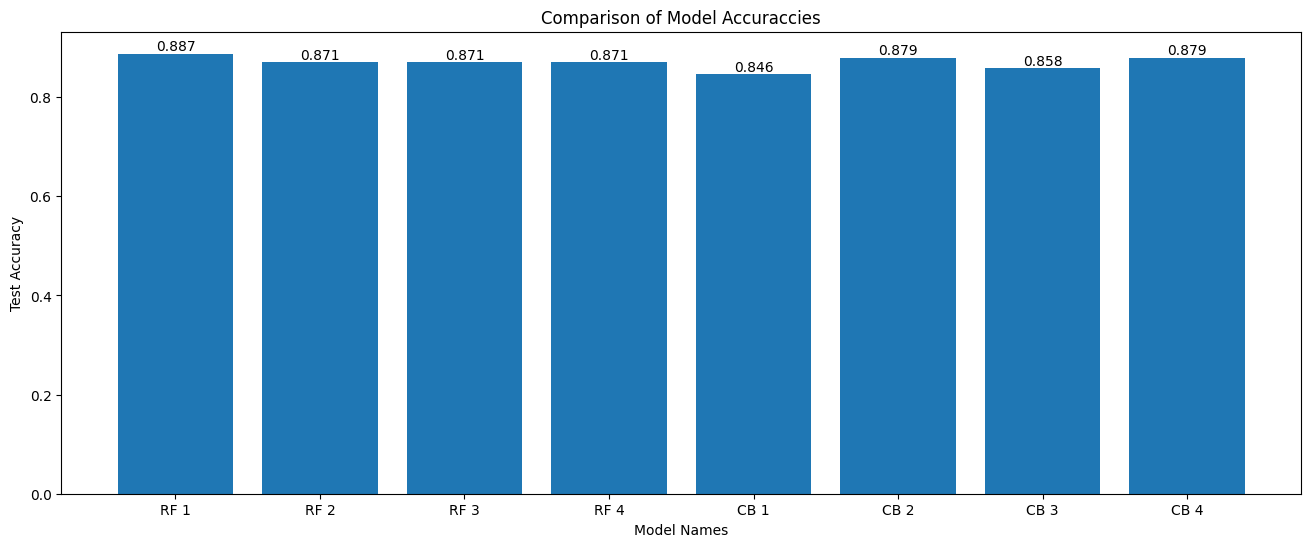

In [75]:
import matplotlib.pyplot as plt
accuracy=[]
models_names=["RF 1", "RF 2", "RF 3", "RF 4", "CB 1",  "CB 2",  "CB 3",  "CB 4"]
for i in weighted_precisions:
    accuracy.append(float(i[2]))
    
plt.figure(figsize=(16, 6))
plt.bar(models_names, accuracy)
plt.xlabel('Model Names')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Accuraccies')
for i, score in enumerate(accuracy):
    plt.text(i, score, str(round(float(score), 3)), ha='center', va='bottom')
plt.show()
plt.show()

>It can be observed that the best Random Forest Model is RF2. Best Cat Boost Model is CB4.

### USER INTERFACE

In [81]:
# target_variables=[1,2,3,6]

In [82]:
def randomForest(user_values):
    crimescore_prediction=rf_2.predict(user_values)
#     print("Prediction using Random Forest : ", target_variables[crimescore_prediction[0]])
    print("Prediction using Random Forest : ", crimescore_prediction[0])

In [83]:
def catBoost(user_values):
    crimescore_prediction=cat_4.predict(user_values)
#     print("Prediction using CatBoost : ", target_variables[crimescore_prediction[0][0]])
    print("Prediction using Cat Boost : ", crimescore_prediction[0][0])

In [84]:
def knnClassifier(user_values):
    crimescore_prediction=knn_1.predict(user_values)
#     print("Prediction using KNN Classifier : ", target_variables[crimescore_prediction[0]])
    print("Prediction using KNN Classifier : ", crimescore_prediction[0])

In [86]:
import numpy as np

print("Welcome To Our Crime Score Prediction Program : ")
print()
print("Here you will answer some of our questions in numbers only :")
print()

# Loop until a valid time of incident is entered
while True:
    try:
        time = int(input("What is the Time of Crime Incident (12PM - 5PM or 5PM - 8PM or 8PM- 5AM or 5AM - 12PM):\nFor 12PM - 5PM Press 0, For 5PM - 8PM Press 2, For 8PM- 5AM Press 3, For 5AM - 12PM Press 1 : "))
        if time not in [0, 1, 2, 3]:
            raise ValueError("Invalid input! Please enter 0, 1, 2, or 3.")
        break  # Exit the loop if a valid time is entered
    except ValueError as e:
        print(e)
        print("Please try again.")
        print()

# Loop until a valid latitude is entered
while True:
    try:
        latitude = float(input("What is the latitude of the area of crime : "))
        if latitude < 24.75000 or latitude > 25.10000:
            raise ValueError("Invalid latitude! Please enter a value between 24.75000 and 25.10000.")
        break  # Exit the loop if a valid latitude is entered
    except ValueError as e:
        print(e)
        print("Please try again.")
        print()

# Loop until a valid longitude is entered
while True:
    try:
        longitude = float(input("What is the longitude of the area of crime : "))
        if longitude < 66.80000 or longitude > 67.36444:
            raise ValueError("Invalid longitude! Please enter a value between 66.80000 and 67.36444.")
        break  # Exit the loop if a valid longitude is entered
    except ValueError as e:
        print(e)
        print("Please try again.")
        print()

values = np.array([time, latitude, longitude])

# Reshape the data point to the expected input shape for the model
v_features_array = values.reshape(1, -1)

# Scaling (uncomment if needed)
# t_values = scaler.transform(v_features_array)

print()
choose = input("Which Model you would like to test : \n-->Press 1 for Random Forest"+
               "\n-->Press 2 for CatBoost\n-->Press 3 for KNN Classifier\n-->Press any other key for Exit\nEnter your option : ")
print()

print("-"*46)
text = "|{:^28}|{:^15}|"
print(text.format("Parameters", "Values"))
print("-"*46)
print(text.format("Time of Incident", time))
print(text.format("Latitude", latitude))
print(text.format("Longitude", longitude))
print("-"*46)
print()

if choose == '1':
    randomForest(v_features_array)
    print("Thank you! For participating in our program...")
elif choose == '2':
    catBoost(v_features_array)
    print("Thank you! For participating in our program...")
elif choose == '3':
    knnClassifier(v_features_array)
    print("Thank you! For participating in our program...")    
else:
    print("Thank you! For participating in our program...")


Welcome To Our Crime Score Prediction Program : 

Here you will answer some of our questions in numbers only :

What is the Time of Crime Incident (12PM - 5PM or 5PM - 8PM or 8PM- 5AM or 5AM - 12PM):
For 12PM - 5PM Press 0, For 5PM - 8PM Press 2, For 8PM- 5AM Press 3, For 5AM - 12PM Press 1 : 5
Invalid input! Please enter 0, 1, 2, or 3.
Please try again.

What is the Time of Crime Incident (12PM - 5PM or 5PM - 8PM or 8PM- 5AM or 5AM - 12PM):
For 12PM - 5PM Press 0, For 5PM - 8PM Press 2, For 8PM- 5AM Press 3, For 5AM - 12PM Press 1 : re
invalid literal for int() with base 10: 're'
Please try again.

What is the Time of Crime Incident (12PM - 5PM or 5PM - 8PM or 8PM- 5AM or 5AM - 12PM):
For 12PM - 5PM Press 0, For 5PM - 8PM Press 2, For 8PM- 5AM Press 3, For 5AM - 12PM Press 1 : 0
What is the latitude of the area of crime : 23
Invalid latitude! Please enter a value between 24.75000 and 25.10000.
Please try again.

What is the latitude of the area of crime : tr
could not convert string t